In [1]:
import sys
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
%matplotlib inline
font = FontProperties()

matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
rcParams['font.family'] = 'sans-serif'

font.set_name('Arial')

In [2]:
sns.set_style()

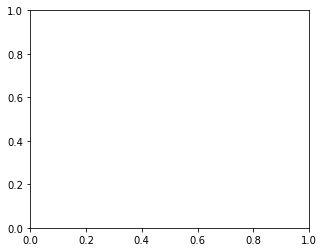

In [3]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

In [4]:
df_ben=pd.read_csv("1-benzene/arom-indices/sa/1.txt",sep="\s+")
df_ben

,SA,−log$_{10}$(SA)
0,0.0001,4.0
1,0.0019,2.7
2,0.0013,2.9
3,0.0029,2.5


In [5]:
df_CBD=pd.read_csv("2-CBD/arom-indices/sa/2.txt",sep="\s+")
df_CBD

,SA,−log$_{10}$(SA)
0,0.0163,1.8
1,0.0008,3.1
2,0.0014,2.9
3,0.0040,2.4


In [6]:
df_cyclohexene=pd.read_csv("3-cyclohexene/arom-indices/sa/3.txt",sep="\s+")
df_cyclohexene

,SA,−log$_{10}$(SA)
0,0.0078,2.1
1,0.0025,2.6
2,0.0033,2.5
3,0.0012,2.9


In [7]:
isomers=["open\n(S$_{0}$)"]+["open\n(S$_{1}$)"]+["open\n(S$_{1}$ CI)"]+["closed\n(S$_{0}$)"]
isomers=isomers*3
isomers

['open\n(S$_{0}$)',
 'open\n(S$_{1}$)',
 'open\n(S$_{1}$ CI)',
 'closed\n(S$_{0}$)',
 'open\n(S$_{0}$)',
 'open\n(S$_{1}$)',
 'open\n(S$_{1}$ CI)',
 'closed\n(S$_{0}$)',
 'open\n(S$_{0}$)',
 'open\n(S$_{1}$)',
 'open\n(S$_{1}$ CI)',
 'closed\n(S$_{0}$)']

In [8]:
systems=4*["Benzene"]+ 4*["Cyclobutadiene"]+4*["Cyclohexene"]
systems

['Benzene',
 'Benzene',
 'Benzene',
 'Benzene',
 'Cyclobutadiene',
 'Cyclobutadiene',
 'Cyclobutadiene',
 'Cyclobutadiene',
 'Cyclohexene',
 'Cyclohexene',
 'Cyclohexene',
 'Cyclohexene']

In [9]:
sa_df=pd.DataFrame()
sa_df["Data point"]=isomers
sa_df["systems"]=systems
sa_df["−log$_{10}$(SA)"]=pd.concat([df_ben["−log$_{10}$(SA)"],df_CBD["−log$_{10}$(SA)"],df_cyclohexene["−log$_{10}$(SA)"]],ignore_index=True, sort=False)
sa_df

,Data point,systems,−log$_{10}$(SA)
0,open\n(S$_{0}$),Benzene,4.0
1,open\n(S$_{1}$),Benzene,2.7
2,open\n(S$_{1}$ CI),Benzene,2.9
3,closed\n(S$_{0}$),Benzene,2.5
4,open\n(S$_{0}$),Cyclobutadiene,1.8
5,open\n(S$_{1}$),Cyclobutadiene,3.1
6,open\n(S$_{1}$ CI),Cyclobutadiene,2.9
7,closed\n(S$_{0}$),Cyclobutadiene,2.4
8,open\n(S$_{0}$),Cyclohexene,2.1
9,open\n(S$_{1}$),Cyclohexene,2.6


In [10]:
sns.barplot(ax=ax,x="Data point",y=r"−log$_{10}$(SA)",hue="systems",data=sa_df)

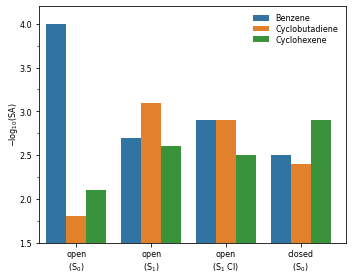

In [11]:
ax.set_ylim(1.5,4.2)
ax.set_xlim(-0.5,3.6)


#ax.hlines(y=3.00,xmin=-0.5,xmax=6.3,ls="dotted",color='black')
ax.legend(frameon=False,loc="upper right",prop={'size': 8},labelspacing=0.2)
#ax.annotate(r"non-aromatic"'\n'"or antiaromatic",xy=[2.2,2.62],fontweight='bold',color='r',size=8)
#ax.annotate(r"aromatic",xy=[2.2,3.3],fontweight='bold',color='r',size=8)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.set_ylabel(r"−log$_{10}$(SA)",size=8,labelpad=-1)
ax.set_xlabel("")
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=7)


fig.tight_layout()
fig.savefig("Fig6.pdf",dpi=600)
fig